In [131]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [132]:
# Define necessary functions
def get_phi_vector(m = 200):
    return np.linspace(0, 2*np.pi, m, endpoint = False)

def compute_V(z,kappa=np.pi/4):
    return np.exp((np.cos(z)-1)/kappa**2)

def compute_h(phi, theta):
    return compute_V(phi-theta)

def V1_dynamics(W, B, h, t, tau = 0.02, dt = 0.001):
    timestamp = int(t/dt)
    n = np.shape(W)[0]
    r = np.zeros((timestamp+1, n))
    for t in range(1,timestamp+1):
        r[t] = r[t-1] + (dt/tau) * (-r[t-1]+ W@r[t-1] + B@h)
    return r


def noisy_readout(r, C, sigma = 1):
    output = r@(C.T)
    noise = sigma * np.random.normal(0, 1, size = np.shape(output))
    return output + noise


def decode(phi, noisy_readout):
    sin_phi = np.sin(phi)
    cos_phi = np.cos(phi)
    return np.arctan2(np.dot(noisy_readout,sin_phi), np.dot(noisy_readout,cos_phi))


def circular_distance(theta, theta_hat):
    return np.arccos(np.cos(theta_hat-theta))

def rescale(W, alpha = 0.9):
    eigval = np.linalg.eigvals(W)
    spectral_abscissa = np.max(np.real(eigval))
    return W * alpha/spectral_abscissa




In [133]:
m = n = 200
n = 200
W1 = np.zeros((m,m))
B = C = np.eye(m)
theta = np.pi
phi = get_phi_vector()

h = compute_h(phi,theta)
r1 = V1_dynamics(W1, B, h, 0.06)
o1 = noisy_readout(r1,C)
theta1 = decode(phi,o1)
error = circular_distance(theta,theta1)


print(np.shape(h))
print(np.shape(r1))
print(np.shape(o1))
print(np.shape(theta1))
print(np.shape(error))

(200,)
(61, 200)
(61, 200)
(61,)
(61,)


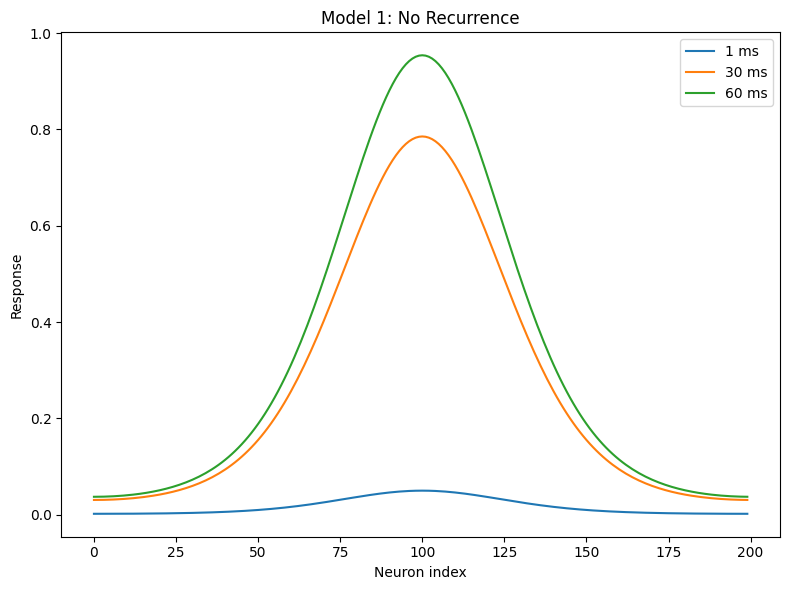

In [134]:
# Parameters for Model 1

N = 1000
m = n = 200
n = 200
W1 = np.zeros((m,m))
B = C = np.eye(m)
theta = np.pi
phi = get_phi_vector()

h = compute_h(phi,theta)
r1 = V1_dynamics(W1, B, h, 0.06)

fig, ax = plt.subplots(figsize= (8,6))
for i in [1,30,60]:
    ax.plot(np.arange(np.shape(r1)[1]), r1[i], label = f'{i} ms')

ax.legend()
ax.set_ylabel('Response')
ax.set_xlabel('Neuron index')
ax.set_title('Model 1: No Recurrence')
plt.tight_layout()
plt.show()


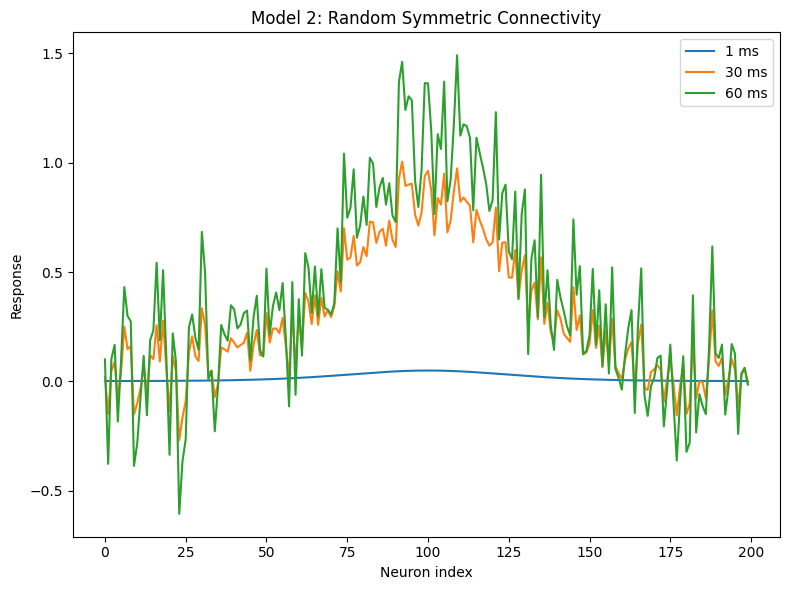

In [135]:
# Parameters for Model 2
Wrand = np.random.normal(0, 1, size = (m,m))
W2 = rescale(Wrand + Wrand.T)
r2 = V1_dynamics(W2, B, h, 0.06)

fig, ax = plt.subplots(figsize= (8,6))
for i in [1,30,60]:
    ax.plot(np.arange(np.shape(r2)[1]), r2[i], label = f'{i} ms')

ax.legend()
ax.set_ylabel('Response')
ax.set_xlabel('Neuron index')
ax.set_title('Model 2: Random Symmetric Connectivity')
plt.tight_layout()
plt.show()


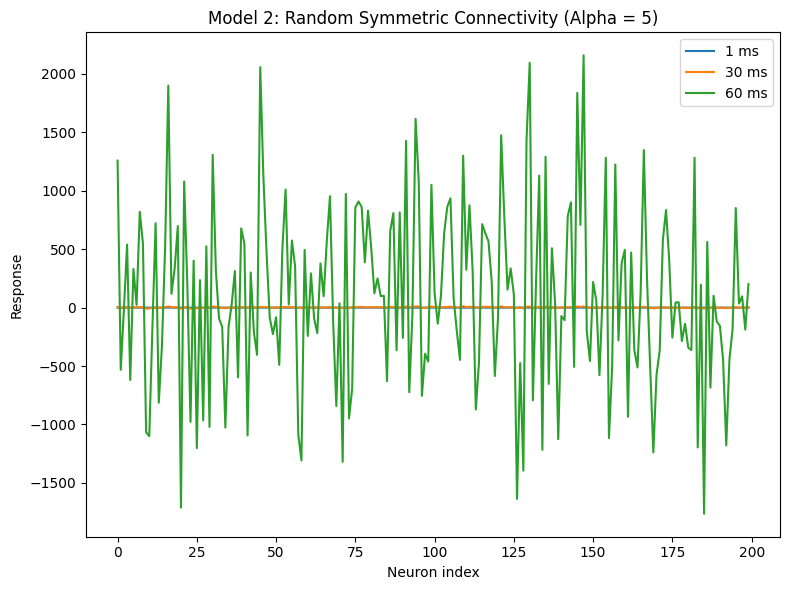

In [136]:
W2_5 = rescale(Wrand + Wrand.T, 5)

r2_5 = V1_dynamics(W2_5, B, h, 0.06)

fig, ax = plt.subplots(figsize= (8,6))
for i in [1,30,60]:
    ax.plot(np.arange(np.shape(r2_5)[1]), r2_5[i], label = f'{i} ms')

ax.legend()
ax.set_ylabel('Response')
ax.set_xlabel('Neuron index')
ax.set_title('Model 2: Random Symmetric Connectivity (Alpha = 5)')
plt.tight_layout()
plt.show()

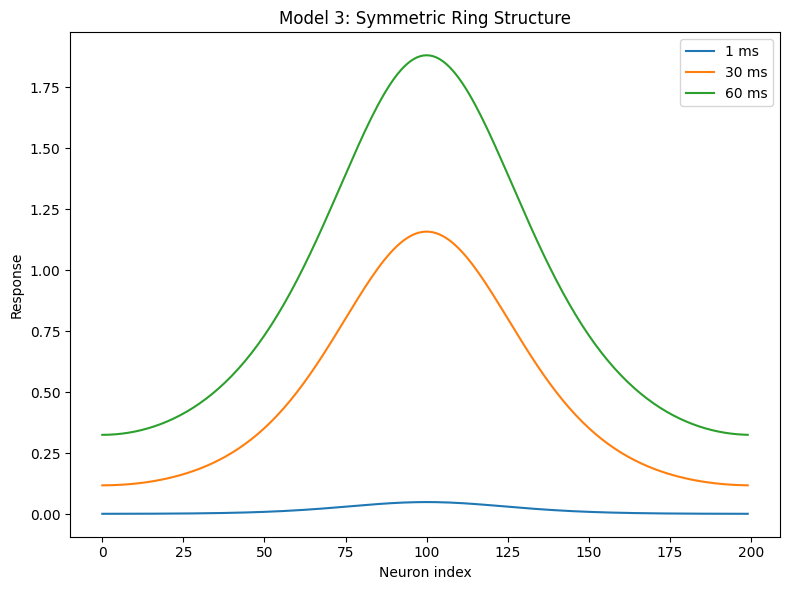

In [137]:
# Parameters for Model 3
W3_init = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        W3_init[i][j] = compute_V(phi[i]-phi[j])

W3 = rescale(W3_init)
r3 = V1_dynamics(W3, B, h, 0.06)

fig, ax = plt.subplots(figsize= (8,6))
for i in [1,30,60]:
    ax.plot(np.arange(np.shape(r3)[1]), r3[i], label = f'{i} ms')

ax.legend()
ax.set_ylabel('Response')
ax.set_xlabel('Neuron index')
ax.set_title('Model 3: Symmetric Ring Structure')
plt.tight_layout()
plt.show()

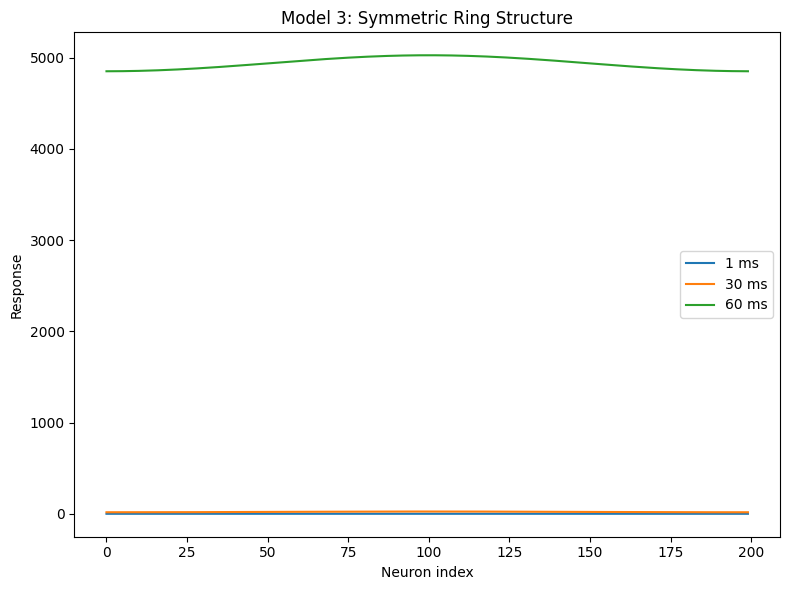

In [138]:
W3_5 = rescale(W3_init,5)
r3_5 = V1_dynamics(W3_5, B, h, 0.06)

fig, ax = plt.subplots(figsize= (8,6))
for i in [1,30,60]:
    ax.plot(np.arange(np.shape(r3_5)[1]), r3_5[i], label = f'{i} ms')

ax.legend()
ax.set_ylabel('Response')
ax.set_xlabel('Neuron index')
ax.set_title('Model 3: Symmetric Ring Structure')
plt.tight_layout()
plt.show()

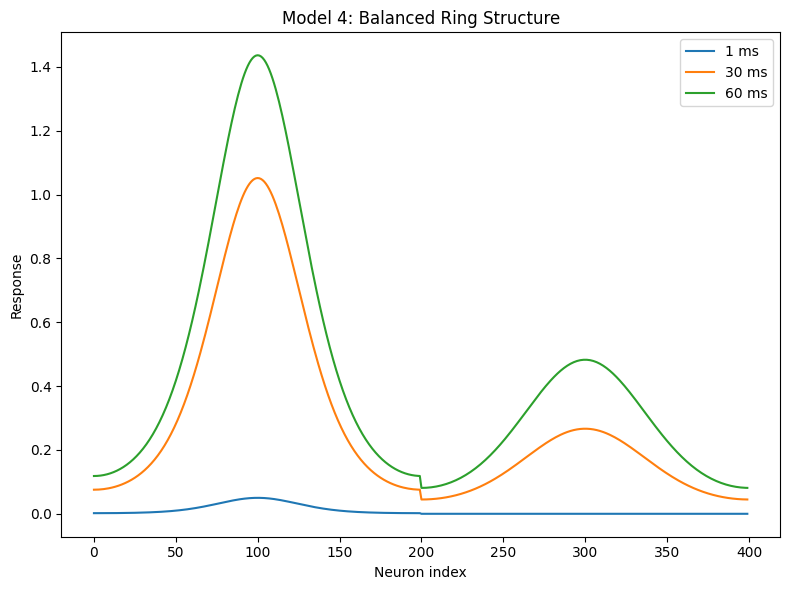

In [139]:
# Parameters for Model 4
W4 = np.block([[W3, -W3] , [W3, -W3]])
n = 400
B = np.block([[np.eye(m)] , [np.zeros((m, m))]])
C4 = np.block([[np.eye(m), np.zeros((m, m))]])

r4 = V1_dynamics(W4, B, h, 0.06)

fig, ax = plt.subplots(figsize= (8,6))
for i in [1,30,60]:
    ax.plot(np.arange(np.shape(r4)[1]), r4[i], label = f'{i} ms')

ax.legend()
ax.set_ylabel('Response')
ax.set_xlabel('Neuron index')
ax.set_title('Model 4: Balanced Ring Structure')
plt.tight_layout()
plt.show()

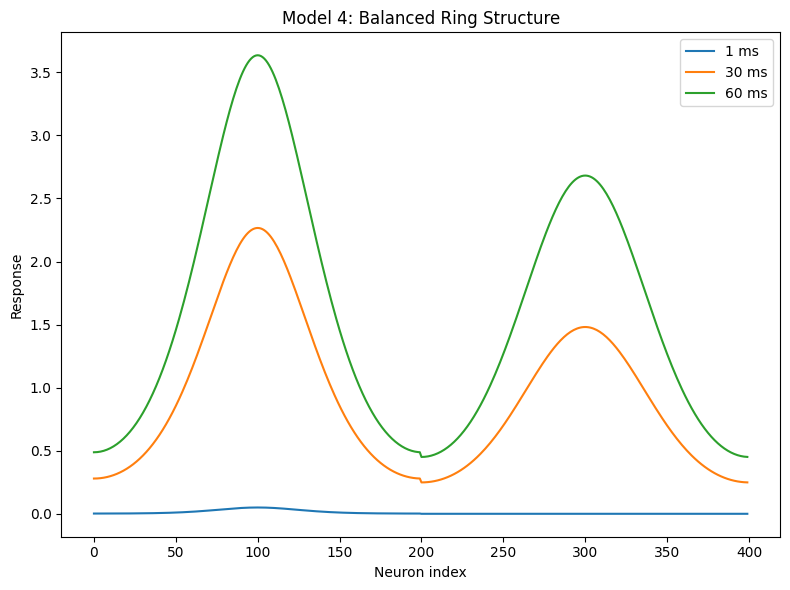

In [140]:
W4_5 = np.block([[W3_5, -W3_5] , [W3_5, -W3_5]])

r4_5 = V1_dynamics(W4_5, B, h, 0.06)

fig, ax = plt.subplots(figsize= (8,6))
for i in [1,30,60]:
    ax.plot(np.arange(np.shape(r4_5)[1]), r4_5[i], label = f'{i} ms')

ax.legend()
ax.set_ylabel('Response')
ax.set_xlabel('Neuron index')
ax.set_title('Model 4: Balanced Ring Structure')
plt.tight_layout()
plt.show()

In [141]:
def plot_eigenvalues(W):
    eigenvalues = np.linalg.eigvals(W)
    
    plt.figure(figsize=(6, 6))
    plt.scatter(eigenvalues.real, eigenvalues.imag, color='blue', label='Eigenvalues')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.xlabel("Real Part")
    plt.ylabel("Imaginary Part")
    plt.title("Eigenvalue Spectrum")
    plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()


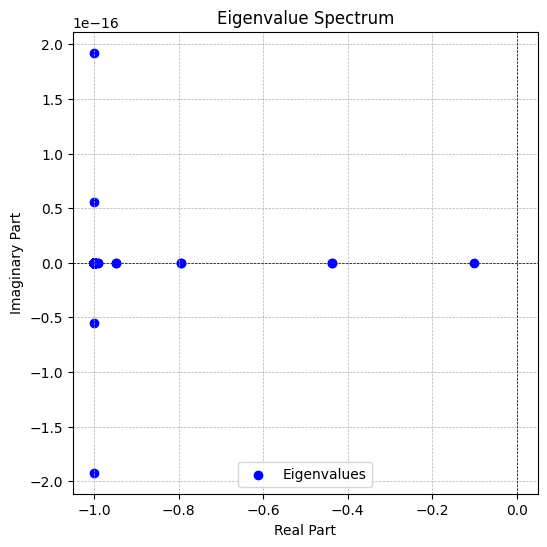

In [142]:
plot_eigenvalues(W3-np.eye(m))

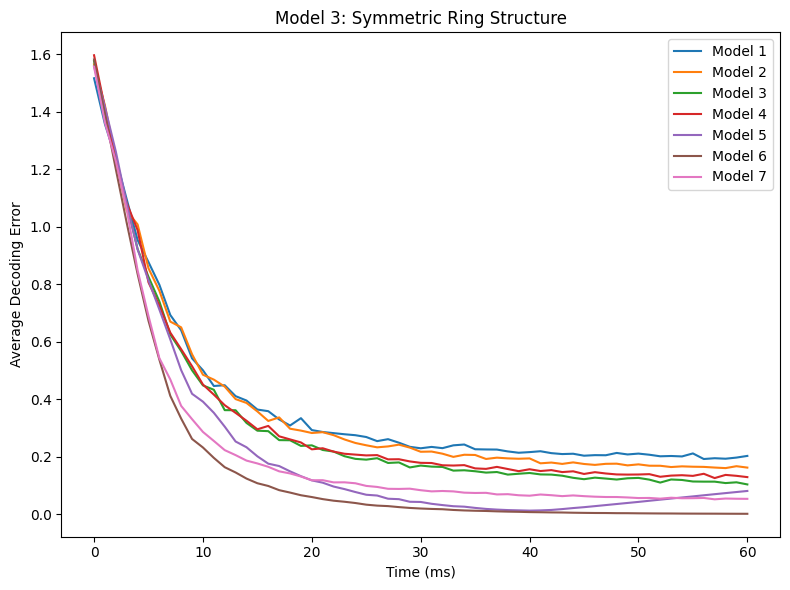

In [143]:
trials = 1000

errors1 = np.zeros((trials,np.shape(r1)[0]))
errors2 = np.zeros((trials,np.shape(r2)[0]))
errors3 = np.zeros((trials,np.shape(r3)[0]))
errors4 = np.zeros((trials,np.shape(r4)[0]))
errors2_5 = np.zeros((trials,np.shape(r2_5)[0]))
errors3_5 = np.zeros((trials,np.shape(r3_5)[0]))
errors4_5 = np.zeros((trials,np.shape(r4_5)[0]))

for trial in range(trials):
    noisy_readout1 = noisy_readout(r1,C)
    noisy_readout2 = noisy_readout(r2,C)
    noisy_readout3 = noisy_readout(r3,C)
    noisy_readout4 = noisy_readout(r4,C4)
    noisy_readout2_5 = noisy_readout(r2_5,C)
    noisy_readout3_5 = noisy_readout(r3_5,C)
    noisy_readout4_5 = noisy_readout(r4_5,C4)

    theta_hat1 = decode(phi, noisy_readout1)
    theta_hat2 = decode(phi, noisy_readout2)
    theta_hat3 = decode(phi, noisy_readout3)
    theta_hat4 = decode(phi, noisy_readout4)
    theta_hat2_5 = decode(phi, noisy_readout2_5)
    theta_hat3_5 = decode(phi, noisy_readout3_5)
    theta_hat4_5 = decode(phi, noisy_readout4_5)

    errors1[trial] = circular_distance(theta, theta_hat1)
    errors2[trial] = circular_distance(theta, theta_hat2)
    errors3[trial] = circular_distance(theta, theta_hat3)
    errors4[trial] = circular_distance(theta, theta_hat4)
    errors2_5[trial] = circular_distance(theta, theta_hat2_5)
    errors3_5[trial] = circular_distance(theta, theta_hat3_5)
    errors4_5[trial] = circular_distance(theta, theta_hat4_5)

av_error1 = np.mean(errors1,axis=0)
av_error2 = np.mean(errors2,axis=0)
av_error3 = np.mean(errors3,axis=0)
av_error4 = np.mean(errors4,axis=0)
av_error2_5 = np.mean(errors2_5,axis=0)
av_error3_5 = np.mean(errors3_5,axis=0)
av_error4_5 = np.mean(errors4_5,axis=0)

av_error_array = [av_error1, av_error2, av_error3, av_error4, av_error2_5, av_error3_5, av_error4_5]
fig, ax = plt.subplots(figsize= (8,6))
for i in range(len(av_error_array)):
    ax.plot(np.arange(len(av_error_array[i])), av_error_array[i], label = f'Model {i+1}')

ax.legend()
ax.set_ylabel('Average Decoding Error')
ax.set_xlabel('Time (ms)')
ax.set_title('Model 3: Symmetric Ring Structure')
plt.tight_layout()
plt.show()